In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)data.cs
mouse_path =os.path.join("..","..","Resources","data","mouse_drug_data.csv")
clinical_path =os.path.join("..","..","Resources","data","clinicaltrial_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df=pd.read_csv(mouse_path)
clinical_df=pd.read_csv(clinical_path)
mouse_df=pd.DataFrame(mouse_df)
clinical_df=pd.DataFrame(clinical_df)
# print(mouse_df.head())
# print(clinical_df.head())
# print(mouse_df.shape)
# print(clinical_df.shape)

# Combine the data into a single dataset
merged_df=pd.merge(clinical_df,mouse_df,on="Mouse ID",how="outer")

# Display the data table for preview

# print(merged_df.shape)
# print(merged_df.isnull().any())
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment 

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_group=merged_df.groupby(['Drug','Timepoint'])

# Convert to DataFrame
tumor_df=pd.DataFrame(tumor_group['Tumor Volume (mm3)'].mean())
tumor_df=tumor_df.reset_index()
tumor_df=tumor_df.rename(columns={'Tumor Volume (mm3)':'Mean Tumor Volume (mm3)'})

# Preview DataFrame
print(tumor_df.shape)
tumor_df.head()

(100, 3)


,Drug,Timepoint,Mean Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_group=merged_df.groupby(['Drug','Timepoint'])

# Convert to DataFrame
sem_df=pd.DataFrame(sem_group['Tumor Volume (mm3)'].sem())
sem_df=sem_df.reset_index()
sem_df=sem_df.rename(columns={'Tumor Volume (mm3)':"Std Err Tumor Volume (mm3)"})

# Preview DataFrame
print(sem_df.shape)
sem_df.head()

(100, 3)


,Drug,Timepoint,Std Err Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# # Minor Data Munging to Re-Format the Data Frames
# tumor_reformat=tumor_df.pivot(index='Timepoint',columns='Drug')
# sem_reformat=sem_df.pivot(index='Timepoint',columns='Drug')

# # Preview that Reformatting worked
# print(tumor_reformat)
# print(sem_reformat)

In [5]:
tumor_merge=pd.merge(tumor_df,sem_df,on=['Drug','Timepoint'],how='outer')
print(tumor_merge.shape)
tumor_merge.head()

(100, 4)


,Drug,Timepoint,Mean Tumor Volume (mm3),Std Err Tumor Volume (mm3)
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.448593
2,Capomulin,10,43.084291,0.702684
3,Capomulin,15,42.064317,0.838617
4,Capomulin,20,40.716325,0.909731


[ 0  5 10 15 20 25 30 35 40 45]


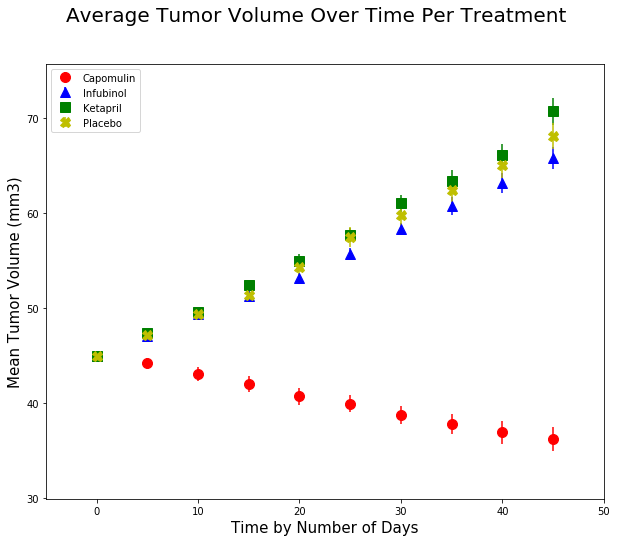

In [6]:
# Generate the Plot (with Error Bars)
x_axis=np.arange(min(tumor_merge['Timepoint']),max(tumor_merge['Timepoint'])+1, 5)
print(x_axis)

capo_mean=np.array(tumor_merge.loc[tumor_merge['Drug']=="Capomulin",'Mean Tumor Volume (mm3)'])
capo_sem=np.array(tumor_merge.loc[tumor_merge['Drug']=="Capomulin",'Std Err Tumor Volume (mm3)'])

infu_mean=np.array(tumor_merge.loc[tumor_merge['Drug']=="Infubinol",'Mean Tumor Volume (mm3)'])
infu_sem=np.array(tumor_merge.loc[tumor_merge['Drug']=="Infubinol",'Std Err Tumor Volume (mm3)'])

keta_mean=np.array(tumor_merge.loc[tumor_merge['Drug']=="Ketapril",'Mean Tumor Volume (mm3)'])
keta_sem=np.array(tumor_merge.loc[tumor_merge['Drug']=="Ketapril",'Std Err Tumor Volume (mm3)'])

plcb_mean=np.array(tumor_merge.loc[tumor_merge['Drug']=="Placebo",'Mean Tumor Volume (mm3)'])
plcb_sem=np.array(tumor_merge.loc[tumor_merge['Drug']=="Placebo",'Std Err Tumor Volume (mm3)'])

fig, tumor=plt.subplots(figsize=(10,8))
fig.suptitle("Average Tumor Volume Over Time Per Treatment", fontsize=20)
tumor.set_xlim(min(x_axis)-5,max(x_axis)+5)
tumor.set_ylim(min(tumor_merge['Mean Tumor Volume (mm3)'])-5,max(tumor_merge['Mean Tumor Volume (mm3)'])+5)
tumor.set_xlabel("Time by Number of Days",fontsize=15)
tumor.set_ylabel("Mean Tumor Volume (mm3)",fontsize=15)
tumor.errorbar(x_axis,capo_mean,yerr=capo_sem, fmt='o', ms=10, color='r', label='Capomulin')
tumor.errorbar(x_axis,infu_mean,yerr=infu_sem, fmt='^', ms=10, color='b', label='Infubinol')
tumor.errorbar(x_axis,keta_mean,yerr=keta_sem, fmt='s', ms=10, color='g', label='Ketapril')
tumor.errorbar(x_axis,plcb_mean,yerr=plcb_sem, fmt='X', ms=10, color='y', label='Placebo')
plt.legend(loc="best", fontsize="medium", fancybox=True)
plt.show()

# Save the Figure


## Metastatic Response to Treatment

In [7]:
 # Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_group=merged_df.groupby(['Drug','Timepoint'])

# Convert to DataFrame
met_df=pd.DataFrame(met_group['Metastatic Sites'].mean())
met_df=met_df.reset_index()
met_df=met_df.rename(columns={'Metastatic Sites':'Mean Met Sites'})

# Preview DataFrame
print(met_df.shape)
met_df.head()

(100, 3)


,Drug,Timepoint,Mean Met Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
 # Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sem_group=merged_df.groupby(['Drug','Timepoint'])

# Convert to DataFrame
met_sem_df=pd.DataFrame(met_sem_group['Metastatic Sites'].sem())
met_sem_df=met_sem_df.reset_index()
met_sem_df=met_sem_df.rename(columns={'Metastatic Sites':'Std Err Met Sites'})

# Preview DataFrame
print(met_sem_df.shape)
met_sem_df.head()

(100, 3)


,Drug,Timepoint,Std Err Met Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
met_merge=pd.merge(met_df,met_sem_df,on=['Drug','Timepoint'],how='outer')
met_merge.head()

,Drug,Timepoint,Mean Met Sites,Std Err Met Sites
0,Capomulin,0,0.000000,0.000000
1,Capomulin,5,0.160000,0.074833
2,Capomulin,10,0.320000,0.125433
3,Capomulin,15,0.375000,0.132048
4,Capomulin,20,0.652174,0.161621


[ 0  5 10 15 20 25 30 35 40 45]


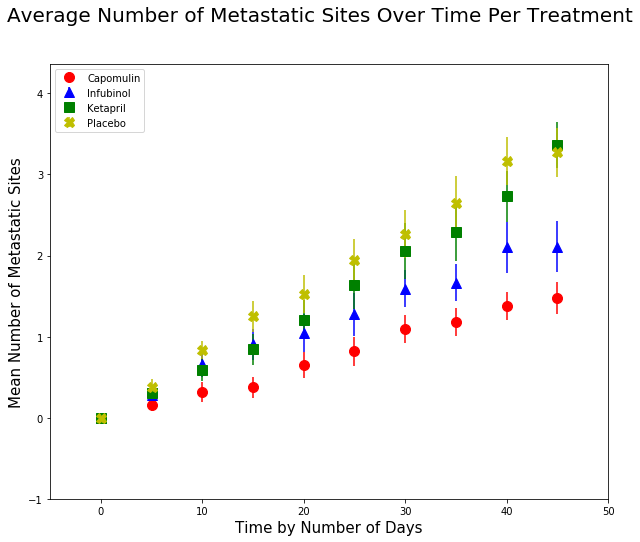

In [10]:
 # Generate the Plot (with Error Bars)
x_axis=np.arange(min(met_merge['Timepoint']),max(met_merge['Timepoint'])+1, 5)
print(x_axis)


fig, met=plt.subplots(figsize=(10,8))
fig.suptitle("Average Number of Metastatic Sites Over Time Per Treatment", fontsize=20)
met.set_xlim(min(x_axis)-5,max(x_axis)+5)
met.set_ylim(min(met_merge['Mean Met Sites'])-1,max(met_merge['Mean Met Sites'])+1)
met.set_xlabel("Time by Number of Days", fontsize=15)
met.set_ylabel("Mean Number of Metastatic Sites", fontsize=15)
met.errorbar(x_axis,np.array(met_merge.loc[met_merge['Drug']=='Capomulin', 'Mean Met Sites']),yerr=np.array(met_merge.loc[met_merge['Drug']=='Capomulin', 'Std Err Met Sites']), fmt='o', ms=10, color='r', label='Capomulin')
met.errorbar(x_axis,np.array(met_merge.loc[met_merge['Drug']=='Infubinol', 'Mean Met Sites']),yerr=np.array(met_merge.loc[met_merge['Drug']=='Infubinol', 'Std Err Met Sites']), fmt='^', ms=10, color='b', label='Infubinol')
met.errorbar(x_axis,np.array(met_merge.loc[met_merge['Drug']=='Ketapril', 'Mean Met Sites']),yerr=np.array(met_merge.loc[met_merge['Drug']=='Ketapril', 'Std Err Met Sites']), fmt='s', ms=10, color='g', label='Ketapril')
met.errorbar(x_axis,np.array(met_merge.loc[met_merge['Drug']=='Placebo', 'Mean Met Sites']),yerr=np.array(met_merge.loc[met_merge['Drug']=='Placebo', 'Std Err Met Sites']), fmt='X', ms=10, color='y', label='Placebo')
plt.legend(loc="upper left", fontsize="medium", fancybox=True)
plt.show()
# Save the Figure

# Show the Figure

## Survival Rates

In [11]:
## Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_group=merged_df.groupby(['Drug','Timepoint'])

## Convert to DataFrame
mice_df=pd.DataFrame(mice_group['Mouse ID'].count())
mice_df=mice_df.reset_index()
mice_df=mice_df.rename(columns={'Mouse ID':'# of Mice'})

## Preview DataFrame
mice_df.head()

,Drug,Timepoint,# of Mice
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
mice_reformat=mice_df.pivot(values='# of Mice',index='Timepoint',columns='Drug')
mice_reformat=pd.DataFrame(mice_reformat)
mice_reformat

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [13]:
##create dataframe for just the 4 treatments we are analyzing for challenge objective
four_tmts=mice_reformat.loc[:,['Capomulin','Infubinol','Ketapril','Placebo']]
# print(four_tmts)

##add new columns to dataframe with survival rate for each treatment
for column in four_tmts:
    rates_list=[]
    for i in four_tmts[column]:
        rate=(i/max(four_tmts[column]))*100
        rates_list.append(rate)
    four_tmts[column+" Survival Rate"]=rates_list
# print(four_tmts)

##create dataframe of just survival rate columns
four_df=four_tmts.iloc[:,4:8]

min_rate=four_df.min().min()
print(min_rate)

x_axis=np.array(four_df.index)
print(x_axis)

four_df

36.0
[ 0  5 10 15 20 25 30 35 40 45]


Drug,Capomulin Survival Rate,Infubinol Survival Rate,Ketapril Survival Rate,Placebo Survival Rate
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0


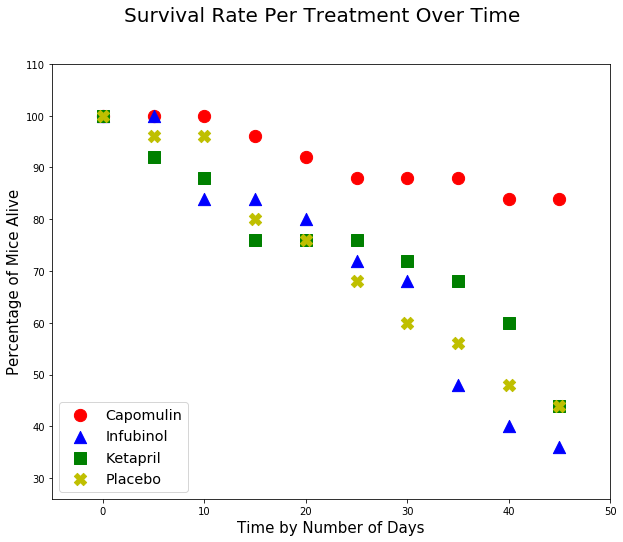

In [14]:
## Generate the Plot (Accounting for percentages)
fig, srate=plt.subplots(figsize=(10,8))
fig.suptitle("Survival Rate Per Treatment Over Time", fontsize=20)
srate.set_xlim(min(x_axis)-5,max(x_axis)+5)
srate.set_ylim(min_rate-10,110)
srate.set_xlabel("Time by Number of Days", fontsize=15)
srate.set_ylabel("Percentage of Mice Alive", fontsize=15)
srate.scatter(x=x_axis,y=four_df['Capomulin Survival Rate'],marker='o', s=150, c='r',label='Capomulin')
srate.scatter(x=x_axis,y=four_df['Infubinol Survival Rate'],marker='^', s=150, c='b',label='Infubinol')
srate.scatter(x=x_axis,y=four_df['Ketapril Survival Rate'],marker='s', s=150, c='g',label='Ketapril')
srate.scatter(x=x_axis,y=four_df['Placebo Survival Rate'],marker='X', s=150, c='y',label='Placebo')
plt.legend(loc='lower left',fontsize='x-large',fancybox=True)
plt.show()

In [15]:
##script to plot survival rate for each treatment without storing rates in dataframe and using loops
##can not easily adjust plot aesthetics this way however so not using
# dot_size=50 
# for column in four_tmts:
#     rates_list=[]
#     dot_size=dot_size-10
#     for i in four_tmts[column]:
#         rate=(i/max(four_tmts[column]))*100
#         rates_list.append(rate)
#     plt.scatter(x=x_axis,y=rates_list,s=dot_size,marker='o',label=column)
#     plt.legend()
#     plt.title("Survival Rate Per Treatment Over Time")
#     plt.xlabel("Time by Number of Days")
#     plt.ylabel("Percentage of Mice Alive")
#     plt.xlim(min(x_axis)-5,max(x_axis)+5)
#     plt.ylim(min(rates_list)-10,max(rates_list)+10)

## Summary Bar Graph

In [16]:
## Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.
## Calculate the percent changes for each drug

# use existing dataframe of data grouped for mean tumor volume by timepoint and drug
# print(tumor_df.head(10))
tumor_reformat=tumor_df.pivot(values='Mean Tumor Volume (mm3)',index='Timepoint',columns='Drug')
print(tumor_reformat)

## calculate the total % tumor volume change for 4 drugs of focus 
c_change=((tumor_reformat['Capomulin'][45]/tumor_reformat['Capomulin'][0])-1)*100
i_change=((tumor_reformat['Infubinol'][45]/tumor_reformat['Infubinol'][0])-1)*100
k_change=((tumor_reformat['Ketapril'][45]/tumor_reformat['Ketapril'][0])-1)*100
p_change=((tumor_reformat['Placebo'][45]/tumor_reformat['Placebo'][0])-1)*100
print(c_change, i_change, k_change, p_change)

## Display the data to confirm
print(f"Capomulin: ' {c_change}")
print(f"Infubinol: ' {i_change}")
print(f"Ketapril: ' {k_change}")
print(f"Placebo: ' {p_change}")

Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   
25         39.939528  54.287674  55.715252  57.678982  56.731968  57.482574   
30         38.769339  56.769517  58.299397  60.994507  59.559509  59.809063   
35         37.816839  58.827548  60.742461  63.371686  62.685087  62.420615   
40         36.958001  61.467895  63.162824  66.068580  65.600754  65.052675   
45         36.236114  64.132421  65.755562  70.662958  69.265506  68.084082   

Drug        Propriva   Ramicane   Stelasyn  Zonifer

[0 1 2 3]


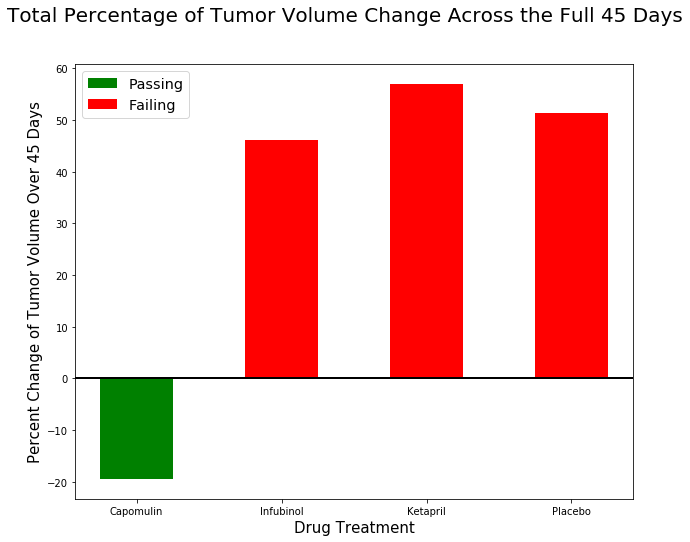

In [57]:
## Store all Relevant Percent Changes into a Tuple
percent_changes=(c_change,i_change,k_change,p_change)

## Splice the data between passing and failing drugs
passing=[c_change]
x_passing=['Capomulin']
failing=[i_change, k_change, p_change]
x_failing=['Infubinol','Ketapril','Placebo']

## Orient widths. Add labels, tick marks, etc.
x=len(percent_changes)
x_axis=np.arange(x)
print(x_axis)
width=0.50

fig, sumbar=plt.subplots(figsize=(10,8))
rects1=sumbar.bar(x=x_passing, height=passing, width=width, align='center', color='g', label='Passing')
rects2=sumbar.bar(x=x_failing, height=failing, width=width, align='center', color='r', label='Failing')
fig.suptitle("Total Percentage of Tumor Volume Change Across the Full 45 Days", fontsize=20)
sumbar.set_xlabel("Drug Treatment", fontsize=15)
sumbar.set_ylabel("Percent Change of Tumor Volume Over 45 Days", fontsize=15)
sumbar.set_xticks(x_axis)
sumbar.set_xticklabels(('Capomulin','Infubinol','Ketapril','Placebo'))
plt.legend(loc='upper left',fontsize='x-large',fancybox=True)
plt.axhline(linewidth=2, color='k')
# plt.grid()
plt.show()

## Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height=rect.get_height()
        sumbar.text(rect.get_x()+rect.get_width()/2, 1.05+height, '%d' % int(height), ha='center',va='bottom')

## Call functions to implement the function calls
autolabel(rects1)
autolabel(rects2)

## Save the Figure
## Show the Figure
fig.show()
plt.show()

In [58]:
sum_dict={'Pass vs Fail':['Passing', 'Failing', 'Failing', 'Failing'], 'Drug':['Capomulin','Infubinol','Ketapril','Placebo'],'Percent Change':percent_changes}
sum_df=pd.DataFrame(sum_dict)
sum_df

,Pass vs Fail,Drug,Percent Change
0,Passing,Capomulin,-19.475303
1,Failing,Infubinol,46.123472
2,Failing,Ketapril,57.028795
3,Failing,Placebo,51.297960
